# Attention-BiLSTM visualization

In [67]:
# Import code from file in upper directory
import sys, os
sys.path.append(os.getcwd() + os.sep + os.pardir)

from tweet_data import TweetsBaseDataset, get_mapping
from attn_lstm import AttentionBiLSTMClassifier
from train import load_model

import torch
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

We start by instantiating a model with empty embeddings, and then loading the weights from an already trained model.

In [2]:
embeddings = np.empty((10002, 300), dtype=np.float32)
model = AttentionBiLSTMClassifier(embeddings)
model = load_model(model, '../runs/attbilstm-Sep28_14-29-40_gpu-deep-learner/best-ckpt.pt')

Now we load the dataset to evaluate the model.

In [5]:
test_set = TweetsBaseDataset.load('../data/test/us_test.set')
idx_to_word = {i: word for word, i in test_set.vocabulary.items()}
emoji_map = get_mapping('../data/mapping/us_mapping.txt')

Loaded dataset with 50000 tweets, 10002 unique tokens


Previously we used the gradients to observe the influence of the input words in the predicted emoji. In the case of the Attention BiLSTM classifier, we can visualize the attention coefficients instead:

In [108]:
def inspect_sample(index):    
    # Get a sample tweet
    inputs, y_true, index = test_set[index]
    # Build mini-batch of size 1 to pass it to the model
    inputs = inputs.unsqueeze(1)
    length = torch.tensor([inputs.shape[0]])

    # Get attention
    outputs, attention = model(inputs, length, return_attention=True)
    y_pred = torch.argmax(outputs)
    attention = attention.squeeze().data.numpy()

    # Plot attention for each word
    words = [idx_to_word[idx.item()] for idx in inputs]
    x = np.arange(len(words))
    plt.figure(figsize=(0.5*len(words), 0.7))
    cmap = cm.get_cmap("YlOrRd")
    colors = cmap(attention / max(attention))
    bars = plt.bar(x, [1 for a in attention], color=colors)
    plt.xticks(x, words, rotation='60')
    plt.yticks([])
    
    # Add colorbar
    sm = ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink=2.5, pad=0.025)
    cbar.set_label("Attention weight")

    plt.show()
    print("Label: {} | Neural prediction: {}".format(emoji_map[y_true.item()], emoji_map[y_pred.item()]))

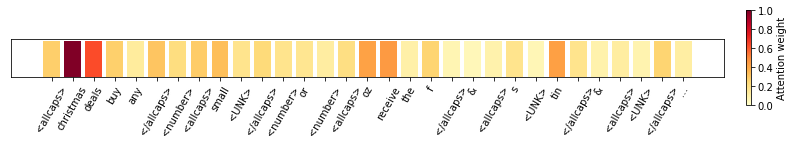

Label: 🎄 | Neural prediction: 🎄


In [109]:
inspect_sample(5)